In [3]:
from pandas import pandas
from data_e import programs_data
program_df = pandas.DataFrame(programs_data)

program_df.loc[program_df['University'] == 'Stellenbosch University', ['Longitude', 'Latitude']] = [18.8679, -33.9321]
program_df.loc[program_df['University'] == 'University of Cape Town', ['Longitude', 'Latitude']] = [18.4719, -33.9628]
program_df.head(2)


,University,Department,Latitude,Longitude,countries
0,University of Cape Town,Department of Biological Sciences,-33.962800,18.471900,South Africa
1,Stellenbosch University,Department of Conservation Ecology and Entomology,-33.932105,18.864042,South Africa


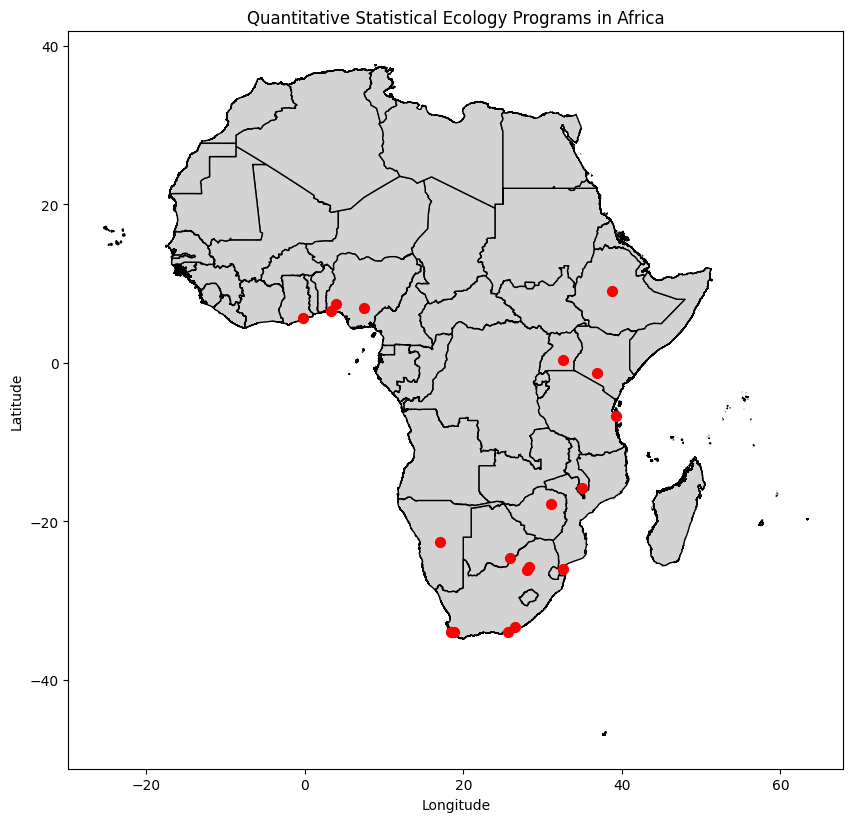

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefile or GeoJSON file of African country boundaries
africa_shapefile = "/Users/asmaatbaeen/Desktop/codePhD/Ch1/afr_g2014_2013_0/afr_g2014_2013_0.shp"  # Replace with the actual file path
  
longitudes = program_df["Longitude"]
latitudes = program_df["Latitude"]
# Create a GeoDataFrame from latitude and longitude values
geometry = gpd.points_from_xy(longitudes, latitudes)
program_gdf = gpd.GeoDataFrame(program_df, geometry=geometry)

# Read shapefile of African country boundaries
africa_gdf = gpd.read_file(africa_shapefile)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot African country boundaries
africa_gdf.plot(ax=ax, color="lightgray", edgecolor="black")

# Plot quantitative statistical ecology program locations
program_gdf.plot(ax=ax, color="red", markersize=50)

# Set plot title and labels
ax.set_title("Quantitative Statistical Ecology Programs in Africa")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()
